   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
Correlation Matrix:
                 R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000


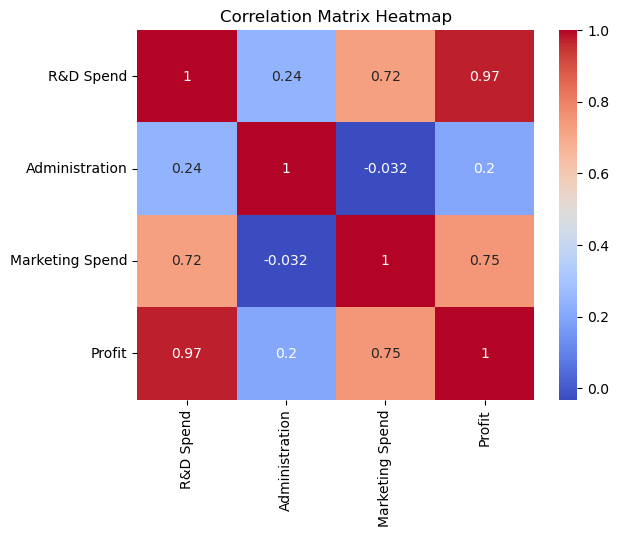

The variable with the highest correlation with 'Profit' is 'R&D Spend' with a correlation coefficient of 0.9729004656594831.
X_SINGLE [165349.2  162597.7  153441.51 144372.41 142107.34 131876.9  134615.46
 130298.13 120542.52 123334.88 101913.08 100671.96  93863.75  91992.39
 119943.24 114523.61  78013.11  94657.16  91749.16  86419.7   76253.86
  78389.47  73994.56  67532.53  77044.01  64664.71  75328.87  72107.6
  66051.52  65605.48  61994.48  61136.38  63408.86  55493.95  46426.07
  46014.02  28663.76  44069.95  20229.59  38558.51  28754.33  27892.92
  23640.93  15505.73  22177.74   1000.23   1315.46      0.      542.05
      0.  ]
Y_SINGLE [192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  967

In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


# Importing the dataset
df = pd.read_csv('~/Downloads/50_Startups.csv')
print(df.head())

datasetx = df.drop(columns=['State'], axis=1)
datasetx.head(10)
# Calculating the Pearson correlation coefficient
correlation_matrix = datasetx.corr()

# Displaying the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation heatmap for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Identify the variable with the highest correlation with 'Profit'
profit_correlation = correlation_matrix['Profit'].drop('Profit')  # Exclude the self-correlation
highest_corr_feature = profit_correlation.idxmax()
highest_corr_value = profit_correlation.max()

print(f"The variable with the highest correlation with 'Profit' is '{highest_corr_feature}' with a correlation coefficient of {highest_corr_value}.")

# Now we perform Single Linear Regression using this variable
x_single = df[highest_corr_feature].values
y_single = df['Profit'].values
print("X_SINGLE",x_single)
print("Y_SINGLE",y_single)
m = len(x_single)
def analytical_solution(x_single, y_single):
    n = len(x_single)
    x_mean = np.mean(x_single)
    y_mean = np.mean(y_single)
    
    # Calculate the coefficients
    b1 = np.sum((x_single - x_mean) * (y_single - y_mean)) / np.sum((x_single - x_mean) ** 2)
    b0 = y_mean - b1 * x_mean
    
    return b0, b1

# Predict function
def predict(x_single, b0, b1):
    return b0 + b1 * x_single

# Sum of Squared Errors (SSE)
def calculate_sse(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# Coefficient of Determination (R²)
def calculate_r2(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Compute regression coefficients using analytical solution
b0_analytical, b1_analytical = analytical_solution(x_single, y_single)
y_pred_analytical = predict(x_single, b0_analytical, b1_analytical)

# Compute SSE and R² for analytical solution
sse_analytical = calculate_sse(y_single, y_pred_analytical)
r2_analytical = calculate_r2(y_single, y_pred_analytical)

print(f"b0: {b0_analytical}, b1: {b1_analytical}")
print(f"Simple Linear Regression SSE: {sse_analytical}")
print(f"Simple Linear Regression RMSE: {np.sqrt(sse_analytical/m)}")
print(f"Simple Linear Regression R-squared: {r2_analytical}")


# Splitting the features and target variable
X = datasetx.iloc[:, :-2].values
y = datasetx.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("Prediction: \n", y_pred)
print("Actual: \n", y_test)
r2_mlr = r2_score(y_test, y_pred)
print(f"Intercept: {regressor.intercept_}")
print(f"Coefficients: {regressor.coef_}")
print(f"Multiple Linear Regression R-squared: {r2_mlr}")
from sklearn import metrics
print('Prediction: ', y_pred)
# Using model.score(X, y)
print('R^2 value: ', regressor.score(X_test, y_test))
print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# Using r2_score(y_true, y_pred) which is done only after training the model
r_squared = metrics.r2_score(y_test, y_pred)
print('R-squared:', r_squared)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('~/Downloads/ToyotaCorolla.csv')

# Handle missing values 
df = df.dropna()  
features = ["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]
target = "Price"
X = df[features]
y = df[target]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Value (R²): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Squared Error (MSE): 1950244.99
R-squared Value (R²): 0.85
Mean Absolute Error (MAE): 995.59
